In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import matplotlib.dates as mdates
from netCDF4 import default_fillvals

load domain file and parameters file that will be modified

In [2]:
direc = '/Users/diana/Dropbox/UW/Research/rasm/25_km'
params_filename = 'vic_params_wr50a_vic5.0.dev_20160328.nc'
domain_filename = 'domain.lnd.wr50a_ar9v4.100920.nc'
domain = xr.open_dataset(os.path.join(direc, domain_filename))
params = xr.open_dataset(os.path.join(direc, params_filename))

change run_cell and domain mask to 0 values for all gridcells 

In [7]:
runcell_vals = params.run_cell.values
mask_vals = domain.mask.values
runcell_vals[runcell_vals == 1] = 0
mask_vals[mask_vals == 1] = 0

reassign those numpy arrays to the domain mask DataArray and parameters file run_cell DataArray

In [8]:
domain.mask.values = mask_vals
params.run_cell.values = runcell_vals

now use the nj and ni indices to run for one or a set of points that we want to understand better 

and change domain mask and parameters run_cell values to 1 for that gridcell using the nj and ni indices

In [10]:
nj_ind = 39
ni_ind = 134
domain.mask.values[nj_ind, ni_ind] = 1
params.run_cell.values[nj_ind, ni_ind] = 1

plot them and output them to make sure that the values actually changed 

1


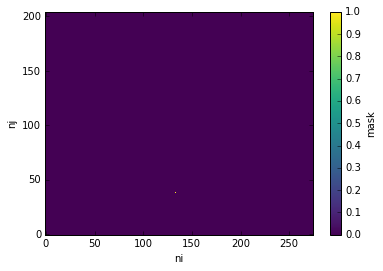

In [11]:
print(domain.mask.values[nj_ind, ni_ind])
domain.mask.plot()

1.0


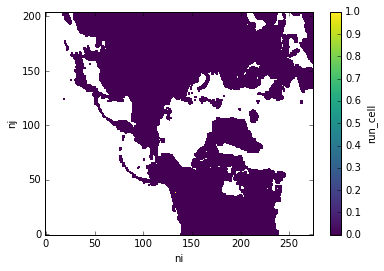

In [12]:
print(params.run_cell.values[nj_ind, ni_ind])
params.run_cell.plot()

now save the domain and parameters file with new names and make sure that the numbers are properly encoded by type
(e.g. `mask` and `run_cell` have to be `np.int32` type or VIC will crash) 

specify directory for these files to be written to

In [18]:
fillval_i = default_fillvals['i4']
encoding_params = {'run_cell': {'dtype': 'int32', "_FillValue": fillval_i}, 
                   'gridcell': {'dtype': 'int32', "_FillValue": fillval_i}, 
                   'fs_active': {'dtype': 'int32', "_FillValue": fillval_i}, 
                   'Nveg': {'dtype': 'int32', "_FillValue": fillval_i},
                   'overstory': {'dtype': 'int32', "_FillValue": fillval_i}}
encoding_domain = {'mask': {'dtype': 'int32', "_FillValue": fillval_i}}

In [19]:
direc_point_runs = '/Users/diana/Dropbox/UW/Research/rasm/point_runs_timing'
new_domain_file = os.path.join(direc_point_runs, 'domain.lnd.20171023.nc')
new_params_file = os.path.join(direc_point_runs, 'params.wr50a.20171023.nc')
domain.to_netcdf(new_domain_file, format='NETCDF4_CLASSIC', encoding=encoding_domain)
params.to_netcdf(new_params_file, format='NETCDF4_CLASSIC', encoding=encoding_params)